# **<center><span style="color:#fd7b12;">Part I - Prosper Loan Data Exploration</span></center>**
    
    
## by OUEDRAOGO Salam

## Introduction

Prosper est une société basée à San Francisco, en Californie, dans le secteur des prêts à des particuliers en ligne. Cet ensemble de données est extrais des données de Prosper. Il est constitué d’environ 113,937 prêts et 81 variables, y compris le montant du prêt, le taux de l'emprunteur (ou taux d'intérêt), le statut actuel du prêt, le revenu de l'emprunteur, et bien d'autres.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Definition de la base de couleur
base_color = sns.color_palette()[0]

In [3]:
# Chargement du dataset prosperLoanData.csv
prosperLoanData = pd.read_csv("prosperLoanData.csv")

In [4]:
# dimension du dataset
prosperLoanData.shape

(113937, 81)

In [5]:
# Selection des Variables necessaire pour l'analyse

columns_name = ["Term", "LoanStatus","BorrowerRate", "InvestmentFromFriendsCount", "ListingCategory (numeric)",\
            "IncomeRange", "IncomeVerifiable","ProsperScore","EmploymentStatus","LoanOriginalAmount",\
            "BorrowerState", "ProsperRating (Alpha)", "IsBorrowerHomeowner","DebtToIncomeRatio", "ListingCreationDate"
           ]
# Verification du nombre de variable selectionné qui est de 15
len(columns_name)

15

In [6]:
'''
    copies les données des colonnes selectionner vers une autre variable nom df
    Cette nouvelle variable aura les 15 colonnes
'''
df = prosperLoanData[columns_name]

### What is the structure of your dataset?

> Le dataset original compte 113937 lignes sur 81 variables y compris le montant du prêt, le taux de l'emprunteur (ou taux d'intérêt), le statut actuel du prêt, le revenu de l'emprunteur, et bien d'autres.

### What is/are the main feature(s) of interest in your dataset?

> Notre étude se portera sur la variable LoanStatus.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>Term, LoanStatus, BorrowerRate, InvestmentFromFriendsCount, ListingCategory (numeric), IncomeRange, IncomeVerifiable, ProsperScore, EmploymentStatus, LoanOriginalAmount, BorrowerState, ProsperRating (Alpha), IsBorrowerHomeowner, DebtToIncomeRatio, ListingCreationDate

In [7]:
"""
Affichage de cinq premier ligne

Pour evaluer les données de base
""" 

df.head()

,Term,LoanStatus,BorrowerRate,InvestmentFromFriendsCount,ListingCategory (numeric),IncomeRange,IncomeVerifiable,ProsperScore,EmploymentStatus,LoanOriginalAmount,BorrowerState,ProsperRating (Alpha),IsBorrowerHomeowner,DebtToIncomeRatio,ListingCreationDate
0,36,Completed,0.1580,0,0,"$25,000-49,999",True,NaN,Self-employed,9425,CO,NaN,True,0.17,2007-08-26 19:09:29.263000000
1,36,Current,0.0920,0,2,"$50,000-74,999",True,7.0,Employed,10000,CO,A,False,0.18,2014-02-27 08:28:07.900000000
2,36,Completed,0.2750,0,0,Not displayed,True,NaN,Not available,3001,GA,NaN,False,0.06,2007-01-05 15:00:47.090000000
3,36,Current,0.0974,0,16,"$25,000-49,999",True,9.0,Employed,10000,GA,A,True,0.15,2012-10-22 11:02:35.010000000
4,36,Current,0.2085,0,2,"$100,000+",True,4.0,Employed,15000,MN,D,True,0.26,2013-09-14 18:38:39.097000000


In [8]:
# Prise en compte des valeurs manquantes dans le dataset
df.isna().sum()

Term                              0
LoanStatus                        0
BorrowerRate                      0
InvestmentFromFriendsCount        0
ListingCategory (numeric)         0
IncomeRange                       0
IncomeVerifiable                  0
ProsperScore                  29084
EmploymentStatus               2255
LoanOriginalAmount                0
BorrowerState                  5515
ProsperRating (Alpha)         29084
IsBorrowerHomeowner               0
DebtToIncomeRatio              8554
ListingCreationDate               0
dtype: int64

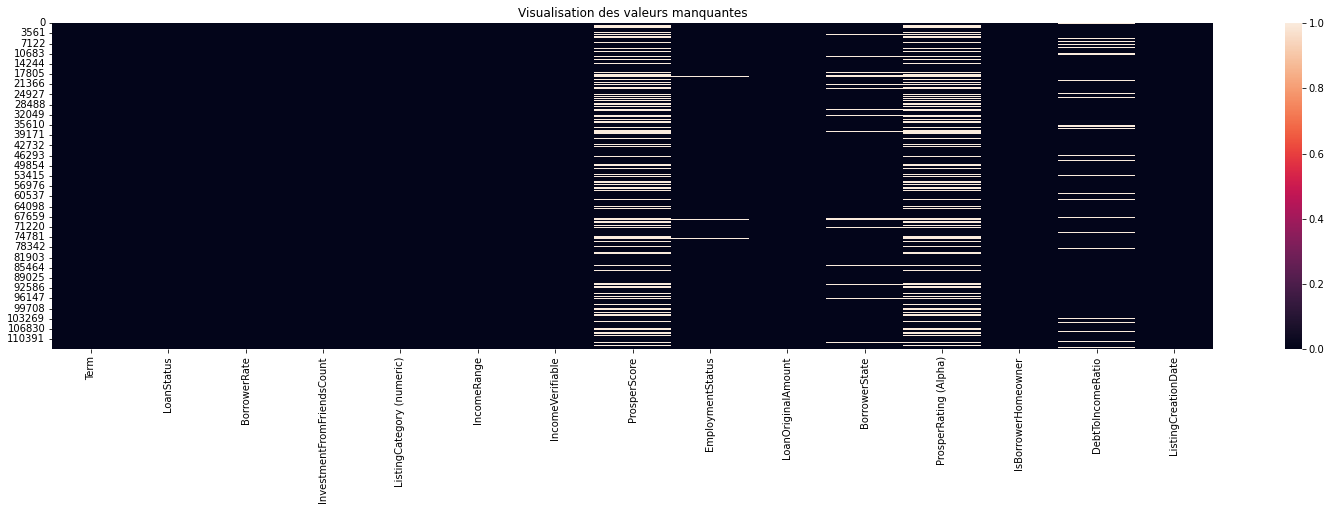

In [9]:
"""
Construire un heatmap en utilisant la méthode heatmap de seaborn

Pour visualiser les variables manquantes

"""
plt.figure(figsize=(26, 6))
sns.heatmap(df.isna());
plt.title("Visualisation des valeurs manquantes");

#### Interprétation

* L'analyse des valeurs manquantes montrent que la variable ClosedDate présente 51.65% de valeurs manquantes. Cela s'expliquerais par le fait que la plupart des prêts ont pour statut soit Current, FinalPayementInProgess ou soit PastDue. Nous tenterons d'approfondir cet aspect dans les visualisations qui suivront.  

* ProsperScore, EstimatedLoss, EstimatedReturn, ProsperRating (Alpha) ont tous chacun 25.53% de valeurs manquantes. En effet, cela est due au fait que ces variables s’appliquent aux prêts dont la date est supérieure à juillet 2009. On peut dire ici que 72% des données ont une date inférieure à juillet 2009.

## Univariate Exploration


### Les emprunteurs préferent-ils plus les prêts de longue durée que de courtes durée?

In [10]:
# compter les occurences les terms de prêts.
term_value_counts = df.Term.value_counts()
term_value_counts

36    87778
60    24545
12     1614
Name: Term, dtype: int64

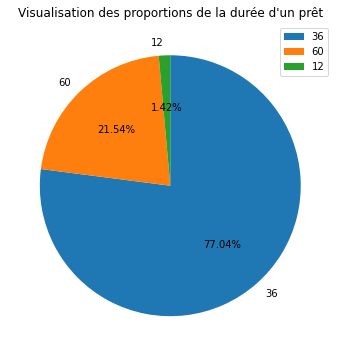

In [11]:
# Visualisation de la variable Term
plt.figure(figsize=(20, 6), facecolor="white")
plt.title("Visualisation des proportions de la durée d'un prêt");
plt.pie(term_value_counts, labels = term_value_counts.index, startangle=90 , counterclock=False, autopct="%.2f%%");
plt.legend();

#### Interprétation

La durée minimum d'un prêt chez l'emprunteur est de 12 moins soit une année pendant que la durée maximum peut aller jusqu'à 60 mois soit 5ans. Mais il y'a également des prêts d'une durée de 3ans. La visualisation ci-dessus montre que la majorité des prêts sont de 3ans soit une proportion de 77.04% sur 113937 observations. Également les prêts de longue durée c'est à dire de 5ans représente 21.54% tandis que les prêts d'une année sont de 1.42%. On constate alors que 98.58% des prêts ont une durée d'au moins 3ans, donc nous pouvons dire que les emprunteurs préfèrent les prêts de longue durée d'autant plus sont étalées sur une longue période de remboursement.

### Quel est l'évolution du nombre de prêt depuis la reforme de 2008 ?

In [12]:
#Affichage des informations sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Term                        113937 non-null  int64  
 1   LoanStatus                  113937 non-null  object 
 2   BorrowerRate                113937 non-null  float64
 3   InvestmentFromFriendsCount  113937 non-null  int64  
 4   ListingCategory (numeric)   113937 non-null  int64  
 5   IncomeRange                 113937 non-null  object 
 6   IncomeVerifiable            113937 non-null  bool   
 7   ProsperScore                84853 non-null   float64
 8   EmploymentStatus            111682 non-null  object 
 9   LoanOriginalAmount          113937 non-null  int64  
 10  BorrowerState               108422 non-null  object 
 11  ProsperRating (Alpha)       84853 non-null   object 
 12  IsBorrowerHomeowner         113937 non-null  bool   
 13  DebtToIncomeRa

In [13]:
# Conversion de la variable "ListingCreationDate" de type objet vers un type datetime64
df["ListingCreationDate"] = df.ListingCreationDate.astype("datetime64", )

In [14]:
# Création d'une nouvelle variable nommé "Year" à partir de la variable existante "ListingCreationDate"
df["Year"] = df.ListingCreationDate.dt.year

In [15]:
# Création d'une nouvelle variable nommé "Month" à partir de la variable existante "ListingCreationDate"
df["Month"] = df.ListingCreationDate.dt.month

In [16]:
# Réquete pour avoir les mois de l'année 2014.
# Nous avons que trois mois. or l'année 2014 doit comporter 12 mois comme les autres années.
df.query("Year == 2014").Month.value_counts()

1    5603
2    4248
3     883
Name: Month, dtype: int64

In [17]:
# Réquete pour avoir les mois de l'année 2013.
# celle-ci compte exactement 12 mois comme prevues.
df.query("Year == 2013").Month.value_counts()

12    5127
10    4672
11    4541
9     3993
7     3224
8     2788
6     2642
5     2520
4     2002
3     1712
2     1105
1     1087
Name: Month, dtype: int64

In [18]:
# Affichage en pourcentage de l'effectif des années du dataset.
100 * df["Year"].value_counts() / df["Year"].value_counts().sum()

2013    31.081212
2012    17.163871
2007    10.143325
2011    10.042392
2008     9.885287
2014     9.420996
2006     5.453014
2010     4.853559
2009     1.936158
2005     0.020187
Name: Year, dtype: float64

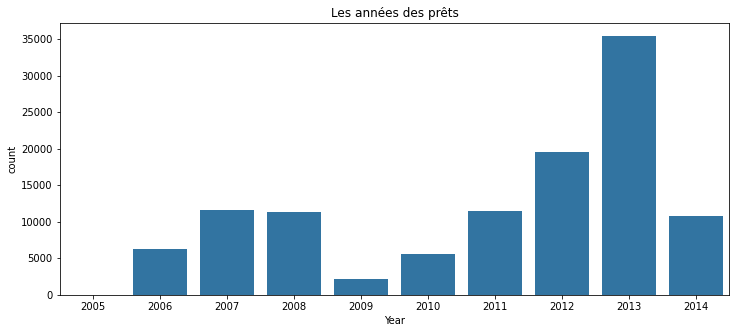

In [19]:
# Visualisation de la variable Year
plt.figure(figsize=(12, 5))
sns.countplot(data = df, x = "Year", color = base_color);
plt.title("Les années des prêts");

#### Interprétation

Il y'a de plus en plus d'emprunt depuis 2009 jusqu'à 2014. En effet, 31.08% des prêts ont été contractés en 2013 et seulement 17.16% en 2012 et en 2011, nous avons 10.04%. L'année 2014 présente un faible pourcentage car l'année 2014 n'est pas une année complète. Nous avons juste 3mois dans cette année. Cette augmentation est probablement dû au reforme fait par PROSPER.

### Quels sont les trois prémiers statut dominant des prêts ?

In [20]:
# Comptage des occurences des status des prêts
LoanStatus_count = df.LoanStatus.value_counts()

# Liste ordonnée des status de prêts
LoanStatus_order = LoanStatus_count.index.to_list()

In [21]:
# Affichage en pourcentage des occurences de status de prêts
100 * LoanStatus_count/LoanStatus_count.sum()

Current                   49.655511
Completed                 33.416713
Chargedoff                10.525115
Defaulted                  4.404188
Past Due (1-15 days)       0.707408
Past Due (31-60 days)      0.318597
Past Due (61-90 days)      0.274713
Past Due (91-120 days)     0.266814
Past Due (16-30 days)      0.232585
FinalPaymentInProgress     0.179924
Past Due (>120 days)       0.014043
Cancelled                  0.004388
Name: LoanStatus, dtype: float64

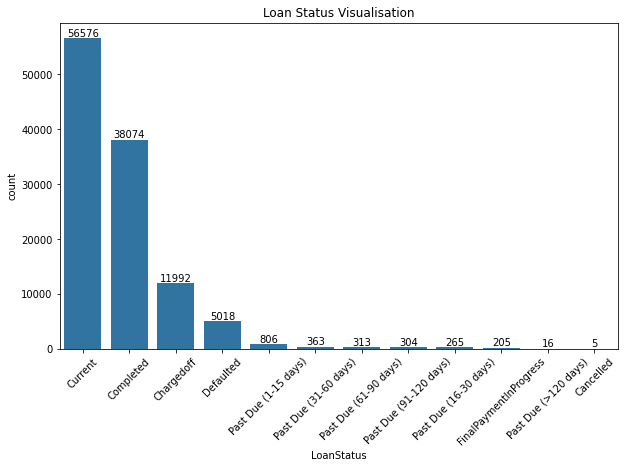

In [22]:
# Visualisation de la variable LoanStatus
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x="LoanStatus", color = base_color, order = LoanStatus_order)
plt.xticks(rotation = 45)
for i in range(len(LoanStatus_count)):
    count = LoanStatus_count[i]
    count_str = str(count)
    plt.text(i, count, count_str, va = "bottom", ha="center")
plt.title("Loan Status Visualisation");

#### Interprétation

Le statut du prêt nous permet de déterminer si le prêt contracter est payé ou non. Nous avons plusieurs statuts. 49.66% des prêts sont en cours de payement. 33.42% des prêts ont été complétement payées. 16.93% des prêts sont en souffrance. C'est-à-dire que les emprunteurs ont du mal pour le remboursement des prêts. 
Dans la suite, nous déterminerons si les prêts en souffrance sont dû à la durée du prêts.

In [23]:
# Renomage de la variable "ListingCategory (numeric)" en "ListingCategory" pour des raisons d'utilisabilité
df = df.rename(columns = {"ListingCategory (numeric)":"ListingCategory"})

In [24]:
# Comptage des occurences de ListingCategory
ListingCategoryCounts = df.ListingCategory.value_counts()
ListingCategoryCounts

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory, dtype: int64

In [25]:
# Libellé des catégories
ListingCategory_str = ["Not Available", "Debt Consolidation", "Home Improvement", "Business", "Personal Loan", "Student Use", "Auto", "Other",\
                       "Baby&Adoption","Boat","Cosmetic Procedure", "Engagement Ring", "Green Loans", "Household Expenses", "Large Purchases",\
                       "Medical/Dental", "Motorcycle", "RV","Taxes", "Vacation", "Wedding Loans"]

In [26]:
# Ajout de la nouvelle variable libellé des catégory en numérique au dataset
df["ListingCategoryStr"] = df.ListingCategory.apply(lambda x : ListingCategory_str[x])

In [27]:
# Test et verifications  de la concordance
df[["ListingCategoryStr", "ListingCategory"]]

,ListingCategoryStr,ListingCategory
0,Not Available,0
1,Home Improvement,2
2,Not Available,0
3,Motorcycle,16
4,Home Improvement,2
...,...,...
113932,Debt Consolidation,1
113933,Other,7
113934,Debt Consolidation,1
113935,Home Improvement,2


In [28]:
# Création d'une liste ordonnées de la liste des catégories libellé
ListingCategoryStrOrder = df.ListingCategoryStr.value_counts().index.to_list()

In [29]:
# Comptage des différentes occurences
ListingCategoryStr_count = df.ListingCategoryStr.value_counts()

In [30]:
# sommation des occurences des catégories
total_ListingCategory = ListingCategoryStr_count.sum()

In [31]:
x_ticks = np.arange(0, 70, 10) # [ 0, 10, 20, 30, 40, 50, 60]
x_ticks_str = [f'{ticks}K' for ticks in x_ticks] # ['0K', '10K', '20K', '30K', '40K', '50K', '60K']

In [32]:
ListingCategoryStr_counts = df.ListingCategoryStr.value_counts()
100 * ListingCategoryStr_counts/ListingCategoryStr_counts.sum()

Debt Consolidation    51.175650
Not Available         14.889808
Other                  9.210353
Home Improvement       6.523781
Business               6.309627
Auto                   2.257388
Personal Loan          2.102039
Household Expenses     1.751845
Medical/Dental         1.335826
Taxes                  0.776745
Large Purchases        0.768846
Wedding Loans          0.676690
Vacation               0.674057
Student Use            0.663525
Motorcycle             0.266814
Engagement Ring        0.190456
Baby&Adoption          0.174658
Cosmetic Procedure     0.079869
Boat                   0.074603
Green Loans            0.051783
RV                     0.045639
Name: ListingCategoryStr, dtype: float64

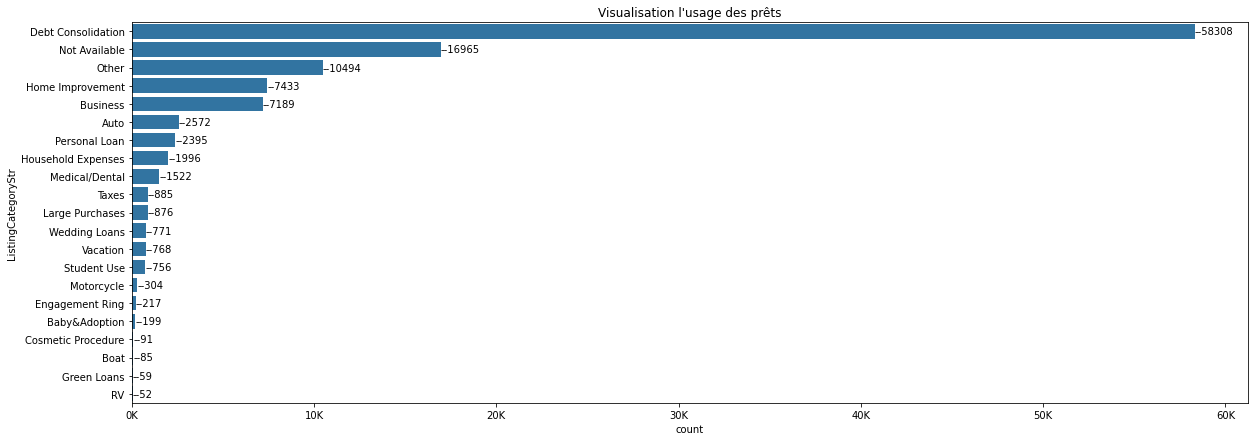

In [33]:
# Visualisation de la variable ListingCategoryStr
plt.figure(figsize=(20, 7))
sns.countplot(y = "ListingCategoryStr", data = df, color=base_color, order=ListingCategoryStrOrder);
plt.xticks(x_ticks * 1000, x_ticks_str)

for i in range(len(ListingCategoryStr_count)):
    count = ListingCategoryStr_count[i]
    count_str = f'--{count}'
    plt.text(count, i, count_str, va ="center" )
plt.title("Visualisation l'usage des prêts");

#### Interprétation

L'analyse des catégories de dettes nous montre qu'environ 51.18% des prêts sont des prêts de consolidation de dettes. En effet, les prêts de consolidation de dettes sont des prêts personnels non garanti qui sont contracter pour consolider plusieurs lignes de dettes de cartes de crédit et/ou d'autres dettes à taux d'intérêt élevés en un seul prêt, idéalement à un taux inférieur. Environ 14.90% des emprunteurs n'ont pas spécifier la raison du prêt alors que 9.21% ont précisé autre(others) relevant des raisons qui n'ont pas été définies. Home Improvement et Business viennent en quatrième et cinquième position. Tous ces résultats sont visualisés sur le graphique en barres ci-dessus.


In [34]:
# Ordonnées le différentes sources de revenues
incomeRange = [ "Not employed", "$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+", "Not displayed"]
incomeRange_type = pd.api.types.CategoricalDtype(categories= incomeRange, ordered= True)
df.IncomeRange = df.IncomeRange.astype(incomeRange_type)

In [35]:
# Comptage des occurences des sources de revenues
incomeRangeCounts = df.IncomeRange.value_counts()

In [36]:
# Sommations des occurences des sources de revenues
incomeRangeCounts_Total = incomeRangeCounts.sum()

In [37]:
# Affichage en pourcentage des sources de revenues
100 * incomeRangeCounts / incomeRangeCounts.sum()

$25,000-49,999    28.254211
$50,000-74,999    27.251902
$100,000+         15.216304
$75,000-99,999    14.846801
Not displayed      6.794106
$1-24,999          6.384230
Not employed       0.707408
$0                 0.545038
Name: IncomeRange, dtype: float64

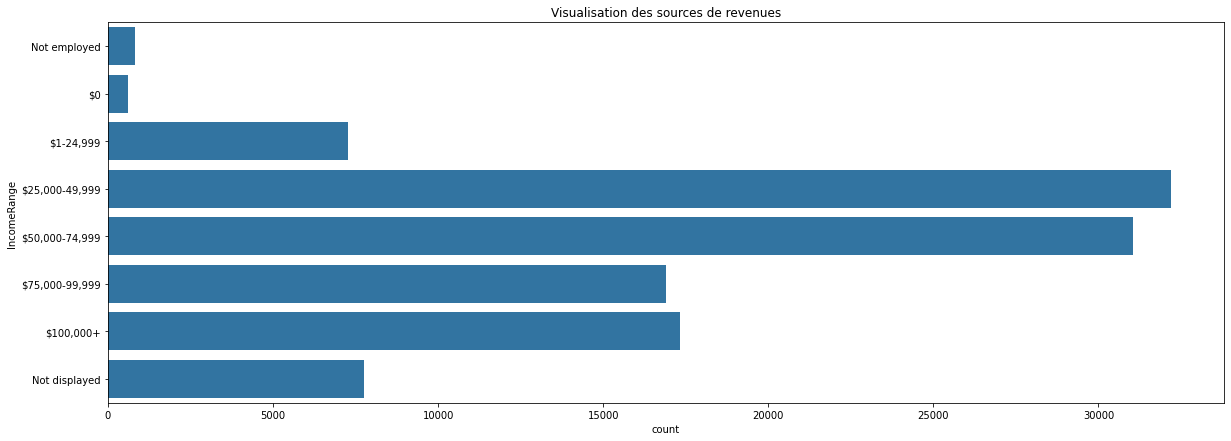

In [38]:
# Visualisations des proportions des source de revenues
plt.figure(figsize=(20, 7))
sns.countplot(data = df, y = "IncomeRange", color = base_color)
plt.title("Visualisation des sources de revenues");

#### Interprétation

L'analyse des plages des sources de revenues nous montre que 28.25% des emprunteurs ont une source de revenues compris dans la plage 25,000-49,999 dollars. 
Aussi 27.25% ont une source de revenus dans la plage 50,000-74,999 dollars. En outre 14.85% et 15.22% ont respectivement leurs sources de revenus dans 75,000-99,999 dollars et $100,000+ dollars.


In [39]:
# Comptage des personnes ayant un document justificatif des sources de revenues
IncomeVerifiable_counts = df.IncomeVerifiable.value_counts()

In [40]:
# Réquetes pour avoir les personnes sans document justificatif
# Affichage du nombre 
df.query("IncomeVerifiable==False").shape

(8669, 18)

In [41]:
# Describtion des personnes sans document justificatif
df.query("IncomeVerifiable==False").describe(include = "all")

,Term,LoanStatus,BorrowerRate,InvestmentFromFriendsCount,ListingCategory,IncomeRange,IncomeVerifiable,ProsperScore,EmploymentStatus,LoanOriginalAmount,BorrowerState,ProsperRating (Alpha),IsBorrowerHomeowner,DebtToIncomeRatio,ListingCreationDate,Year,Month,ListingCategoryStr
count,8669.000000,8669,8669.000000,8669.000000,8669.000000,8669,8669,7333.000000,8630,8669.000000,8538,7333,8669,280.000000,8669,8669.000000,8669.000000,8669
unique,NaN,12,NaN,NaN,NaN,8,1,NaN,8,NaN,51,7,2,NaN,8587,NaN,NaN,21
top,NaN,Current,NaN,NaN,NaN,"$25,000-49,999",False,NaN,Self-employed,NaN,CA,C,False,NaN,2013-12-23 22:40:00.947000,NaN,NaN,Debt Consolidation
freq,NaN,4142,NaN,NaN,NaN,2325,8669,NaN,5138,NaN,1213,1469,5264,NaN,3,NaN,NaN,3703
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-09 17:19:40.003000,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-10 12:20:53.760000,NaN,NaN,NaN
mean,39.360941,NaN,0.218716,0.048564,3.379513,NaN,NaN,4.755353,NaN,7111.896413,NaN,NaN,NaN,6.695441,NaN,2011.389664,6.551505,NaN
std,9.788886,NaN,0.078188,0.460302,3.915928,NaN,NaN,2.191746,NaN,4884.342838,NaN,NaN,NaN,4.634911,NaN,2.003335,3.568892,NaN
min,12.000000,NaN,0.005000,0.000000,0.000000,NaN,NaN,1.000000,NaN,1000.000000,NaN,NaN,NaN,0.000440,NaN,2006.000000,1.000000,NaN
25%,36.000000,NaN,0.151500,0.000000,1.000000,NaN,NaN,3.000000,NaN,4000.000000,NaN,NaN,NaN,0.340000,NaN,2010.000000,3.000000,NaN


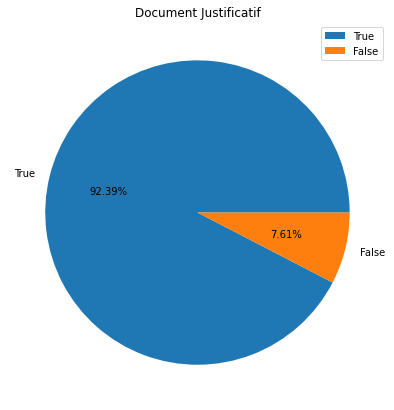

In [42]:
# Visualisations de la variable IncomeVerifiable
plt.figure(figsize=(16, 7), facecolor="white")
plt.pie(x = IncomeVerifiable_counts, labels= IncomeVerifiable_counts.index, autopct="%.2f%%");
plt.legend()
plt.title("Document Justificatif");

#### Interprétation

92.39% des emprunteurs ont un document permettant de justifier leurs sources de revenus. Tandis que 7.61% d'entre eux n'ont pas de documents justificatifs. Ces personnes sont dans la plupart du cas des 'self-employed'. Leur activité quotidienne est-elle qu'elles ne peuvent pas avoir de documents attestant source de revenus.


### Dans quel ville aux USA, les banques sont plus favorables aux prêts ?

In [43]:
# value count des occurences de chaque pays
BorrowerState_counts = df.BorrowerState.value_counts()

In [44]:
# Affichage en pourcentage des effectif
100 * BorrowerState_counts/BorrowerState_counts.sum()

CA    13.573813
TX     6.310527
NY     6.206305
FL     6.198004
IL     5.461069
GA     4.618989
OH     3.870986
MI     3.313903
VA     3.023372
NJ     2.856431
NC     2.844441
WA     2.811238
PA     2.741141
MD     2.601870
MO     2.411872
MN     2.137942
MA     2.067846
CO     2.038332
IN     1.916585
AZ     1.753334
WI     1.698917
OR     1.675859
TN     1.602073
AL     1.548579
CT     1.500618
SC     1.034845
NV     1.005331
KS     0.979506
KY     0.906643
OK     0.895575
LA     0.879895
UT     0.808876
AR     0.788585
MS     0.725867
NE     0.621645
ID     0.552471
NH     0.508199
NM     0.435336
RI     0.401210
HI     0.377230
WV     0.360628
DC     0.352327
MT     0.304366
DE     0.276697
VT     0.190921
AK     0.184464
SD     0.174319
IA     0.171552
WY     0.138348
ME     0.093155
ND     0.047961
Name: BorrowerState, dtype: float64

In [45]:
# Création d'une liste ordonnées des pays par nombre d'occurence
BorrowerState_order = BorrowerState_counts.index.to_list()

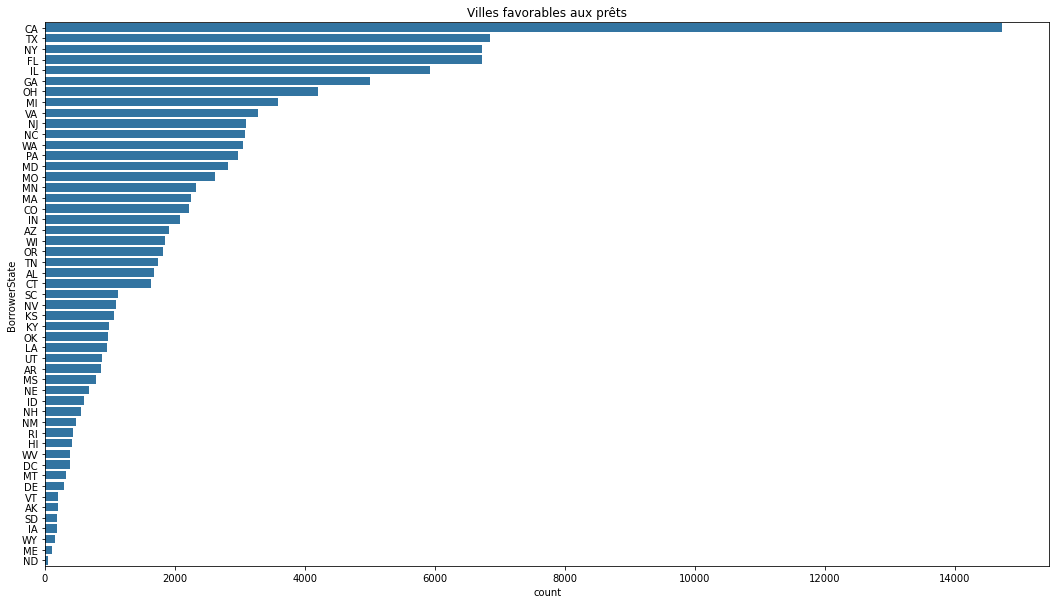

In [46]:
# Visualisation des effectif par villes
plt.figure(figsize = (18, 10))
sns.countplot(data = df, y = "BorrowerState", color= base_color, order = BorrowerState_order);
plt.title("Villes favorables aux prêts");

#### Interprétation
La ville California (CA) présente beaucoup plus prêts avec environ 13.57% cela est dû principalement au qu'il y’a beaucoup plus d'habitant en California que les autres villes et deuxième parce que les banques en California sont beaucoup plus favorables aux prêts. La Florida (FL) vient en deuxième position avec 6.31%. Le Texas et Le New York (NY) viennent respectivement en troisième et quatrième position.


In [47]:
# value count des status d'emplois des emprunteurs
EmploymentStatus_counts = df.EmploymentStatus.value_counts()
EmploymentStatus_counts_index = EmploymentStatus_counts.index.to_list()
EmploymentStatus_counts_total = EmploymentStatus_counts.sum() # Sommation des effectifs

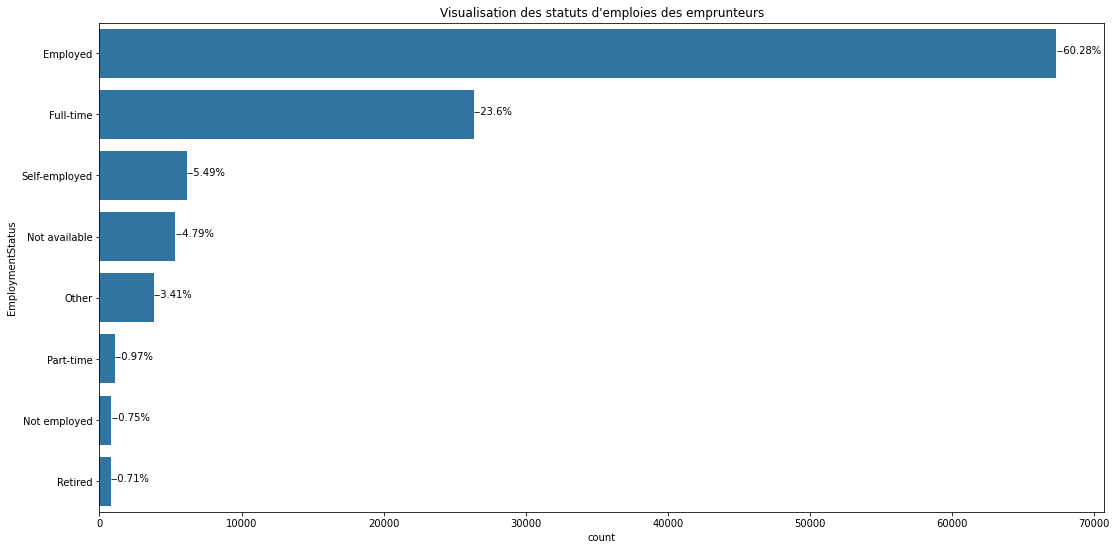

In [48]:
# Visualisation des status d'emplois des emprunteurs
plt.figure(figsize = (18, 9))
sns.countplot(data = df, y = "EmploymentStatus", color = base_color, order=EmploymentStatus_counts_index)
plt.title("Visualisation des statuts d'emploies des emprunteurs");
for i in range(len(EmploymentStatus_counts)):
    count = EmploymentStatus_counts[i]
    count_str = f'--{ np.round(100 * count/EmploymentStatus_counts_total, 2)}%'
    plt.text(count, i, count_str)

#### Interprétation

La majorité des emprunteurs sont des employées soit environ une proportion 60% de l'effectif total. En plus, les emprunteurs travaillant à temps plein ont une proportion de 24% et viens en deuxième position. En troisième position, nous avons les auto-employeurs avec une proportion de 5.49%. Cependant 4.79% des employées n'ont pas préciser leurs statues d'emplois.


In [49]:
# Compter les différentes occurences
IsBorrowerHomeowner_count = df.IsBorrowerHomeowner.value_counts()

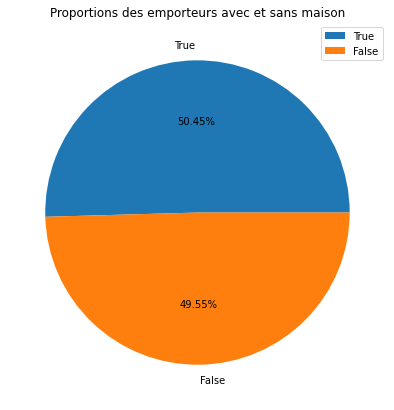

In [50]:
# Visualisation des proportions de la variable IsBorrowerHomeowner
plt.figure(figsize = (18, 7), facecolor="white")
plt.pie(IsBorrowerHomeowner_count, labels= IsBorrowerHomeowner_count.index, autopct="%.2f%%");
plt.legend()
plt.title("Proportions des emporteurs avec et sans maison");

#### Interprétation
50.45% des emprunteurs ont une maison et 49.55% n'en ont pas. Cela s'explique par le fait que la plupart des personnes aux USA n'ont pas une maison fixe à leur nom. La majorité sont en location.


In [51]:
# Describe des taux d'interêts des prêts
df.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

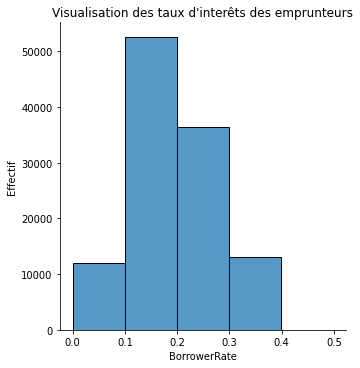

In [52]:
# Visulisation des taux d'interêts
sns.displot(data = df, x="BorrowerRate", bins=5)
plt.xlabel("BorrowerRate")
plt.ylabel("Effectif");
plt.title("Visualisation des taux d'interêts des emprunteurs");

#### Interprétation

L'analyse de la variable 'BorrowerRate', nous apprends qu'il y'a des prêts dont le taux d'intérêts est 0.00%. Mais il y'a également des prêts qui peuvent aller jusqu'à 50%. Néanmoins la majorité (75%) des prêts ont un taux d'intérêts inférieur à 30% et en moyenne nous avons 20%.


In [53]:
# Visualisation du rapport des dettes sur le revenues
df.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

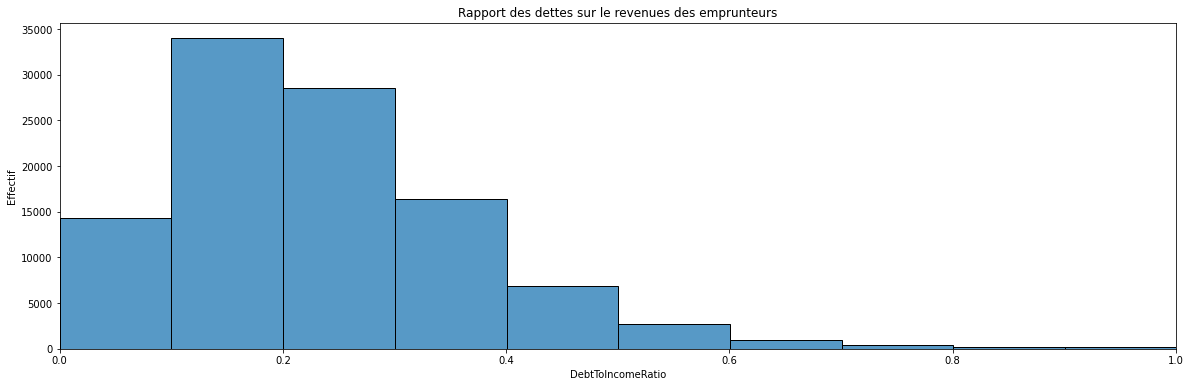

In [54]:
# Visualisation des rapports de dette sur le revenue
plt.figure(figsize =(20, 6))
sns.histplot(data = df, x = "DebtToIncomeRatio", bins=100);
plt.xlabel("DebtToIncomeRatio")
plt.ylabel("Effectif");
plt.xlim((0, 1))
plt.title("Rapport des dettes sur le revenues des emprunteurs");

#### Interprétation

Le rapport des dettes sur les revenues nous permet de dire que la majorité des personnes sont solvables. Cependant il y'a des gens qui sont dans une zone d'alerte étant données le rapport trop élevé. Plus le rapport est élevé plus l'emprunteur à des problèmes de solvabilité.


In [55]:
# Describe de la variable LoanAmount
df.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [56]:
# Création de nouvelles ticks pour la variable LoanOriginalAmount
x_ticks = np.arange(0, 40, 5)
x_ticks_str = [f'{tick}K' for tick in x_ticks]

In [57]:
loan_bins = np.arange(0, 35_000, 1_000)

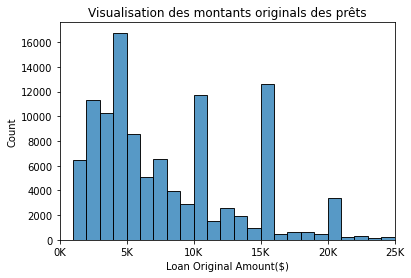

In [58]:
# Visualisation de la variable LoanOriginalAmount
sns.histplot(data = df, x = "LoanOriginalAmount", bins = loan_bins)
plt.title("Visualisation des montants originals des prêts");
plt.xlabel("Loan Original Amount($)");
plt.xticks(x_ticks * 1_000, x_ticks_str);
plt.xlim((0, 25000));

#### Interprétation

Les montants de prêts vont de 1000 dollars à 35000 dollars. La majorité des montant sont aux environs de 12_000 dollars. Seul quelques minorités ont un prêt dont la valeur dépasse cette valeur.


In [59]:
# Suppression des score qui sont supérieur à 10
df.drop(df.query("ProsperScore>10").index, inplace=True)

In [60]:
# Observation de la description des données dont le score est 6
df.query("ProsperScore==6").describe(include="all")

,Term,LoanStatus,BorrowerRate,InvestmentFromFriendsCount,ListingCategory,IncomeRange,IncomeVerifiable,ProsperScore,EmploymentStatus,LoanOriginalAmount,BorrowerState,ProsperRating (Alpha),IsBorrowerHomeowner,DebtToIncomeRatio,ListingCreationDate,Year,Month,ListingCategoryStr
count,12278.000000,12278,12278.000000,12278.000000,12278.000000,12278,12278,12278.0,12278,12278.000000,12278,12278,12278,11309.000000,12278,12278.000000,12278.000000,12278
unique,NaN,11,NaN,NaN,NaN,7,2,NaN,7,NaN,48,7,2,NaN,12278,NaN,NaN,20
top,NaN,Current,NaN,NaN,NaN,"$50,000-74,999",True,NaN,Employed,NaN,CA,D,True,NaN,2013-12-17 09:18:33.220000,NaN,NaN,Debt Consolidation
freq,NaN,7981,NaN,NaN,NaN,3870,11308,NaN,10130,NaN,1438,3256,6181,NaN,1,NaN,NaN,7810
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-07-14 15:17:09.697000,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-09 09:37:16.023000,NaN,NaN,NaN
mean,43.373188,NaN,0.206217,0.005050,3.278873,NaN,NaN,6.0,NaN,9222.604414,NaN,NaN,NaN,0.268113,NaN,2012.290194,6.744014,NaN
std,12.213010,NaN,0.065070,0.075341,4.341675,NaN,NaN,0.0,NaN,5901.517994,NaN,NaN,NaN,0.347909,NaN,1.127060,3.572957,NaN
min,12.000000,NaN,0.069900,0.000000,0.000000,NaN,NaN,6.0,NaN,1000.000000,NaN,NaN,NaN,0.000000,NaN,2009.000000,1.000000,NaN
25%,36.000000,NaN,0.153500,0.000000,1.000000,NaN,NaN,6.0,NaN,4000.000000,NaN,NaN,NaN,0.160000,NaN,2012.000000,4.000000,NaN


In [61]:
# Observation de la description des données dont le score est 6
df.query("ProsperScore==10").describe(include="all")

,Term,LoanStatus,BorrowerRate,InvestmentFromFriendsCount,ListingCategory,IncomeRange,IncomeVerifiable,ProsperScore,EmploymentStatus,LoanOriginalAmount,BorrowerState,ProsperRating (Alpha),IsBorrowerHomeowner,DebtToIncomeRatio,ListingCreationDate,Year,Month,ListingCategoryStr
count,4750.000000,4750,4750.000000,4750.000000,4750.000000,4750,4750,4750.0,4750,4750.000000,4750,4750,4750,4639.000000,4750,4750.000000,4750.000000,4750
unique,NaN,10,NaN,NaN,NaN,6,2,NaN,7,NaN,48,7,2,NaN,4750,NaN,NaN,20
top,NaN,Current,NaN,NaN,NaN,"$100,000+",True,NaN,Employed,NaN,CA,AA,True,NaN,2013-12-14 08:26:37.093000,NaN,NaN,Debt Consolidation
freq,NaN,3054,NaN,NaN,NaN,1737,4639,NaN,3774,NaN,789,2645,3055,NaN,1,NaN,NaN,2706
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-07-13 18:01:24.347000,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-10 07:33:30.033000,NaN,NaN,NaN
mean,41.679158,NaN,0.097969,0.020000,3.344211,NaN,NaN,10.0,NaN,11742.895368,NaN,NaN,NaN,0.176555,NaN,2012.165053,6.407789,NaN
std,12.323011,NaN,0.034783,0.174796,4.156757,NaN,NaN,0.0,NaN,7976.457183,NaN,NaN,NaN,0.113795,NaN,1.411576,3.853582,NaN
min,12.000000,NaN,0.040000,0.000000,0.000000,NaN,NaN,10.0,NaN,1000.000000,NaN,NaN,NaN,0.010000,NaN,2009.000000,1.000000,NaN
25%,36.000000,NaN,0.071600,0.000000,1.000000,NaN,NaN,10.0,NaN,5000.000000,NaN,NaN,NaN,0.100000,NaN,2011.000000,2.000000,NaN


In [62]:
# Observation de la description des données dont le score est 6
df.query("ProsperScore==4").describe(include="all")

,Term,LoanStatus,BorrowerRate,InvestmentFromFriendsCount,ListingCategory,IncomeRange,IncomeVerifiable,ProsperScore,EmploymentStatus,LoanOriginalAmount,BorrowerState,ProsperRating (Alpha),IsBorrowerHomeowner,DebtToIncomeRatio,ListingCreationDate,Year,Month,ListingCategoryStr
count,12595.000000,12595,12595.000000,12595.000000,12595.000000,12595,12595,12595.0,12595,12595.000000,12595,12595,12595,11164.000000,12595,12595.000000,12595.000000,12595
unique,NaN,11,NaN,NaN,NaN,7,2,NaN,7,NaN,48,7,2,NaN,12595,NaN,NaN,20
top,NaN,Current,NaN,NaN,NaN,"$25,000-49,999",True,NaN,Employed,NaN,CA,C,False,NaN,2013-09-14 18:38:39.097000,NaN,NaN,Debt Consolidation
freq,NaN,9476,NaN,NaN,NaN,4288,11149,NaN,10181,NaN,1563,4738,6371,NaN,1,NaN,NaN,8502
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-07-28 14:42:08.530000,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-09 17:52:39.800000,NaN,NaN,NaN
mean,42.833188,NaN,0.225381,0.003017,3.121715,NaN,NaN,4.0,NaN,8401.919889,NaN,NaN,NaN,0.294549,NaN,2012.692815,6.836919,NaN
std,11.378891,NaN,0.061563,0.062937,4.299348,NaN,NaN,0.0,NaN,5322.639006,NaN,NaN,NaN,0.320447,NaN,0.988038,3.731468,NaN
min,12.000000,NaN,0.071600,0.000000,0.000000,NaN,NaN,4.0,NaN,1000.000000,NaN,NaN,NaN,0.000000,NaN,2009.000000,1.000000,NaN
25%,36.000000,NaN,0.179000,0.000000,1.000000,NaN,NaN,4.0,NaN,4000.000000,NaN,NaN,NaN,0.190000,NaN,2012.000000,3.000000,NaN


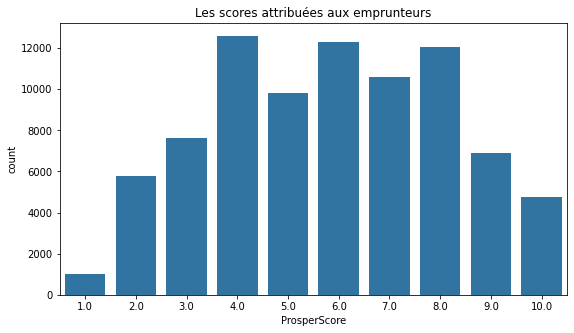

In [63]:
# Visualisation de la variable Prosperscore
plt.figure(figsize =(20, 5))
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = "ProsperScore", color = base_color);
plt.title("Les scores attribuées aux emprunteurs");

#### Interprétation

Le score de prosper permet d'évaluer les risques liés aux emprunts. Le score va de 1-10. 10 signifie meilleur score soit un faible risque de non remboursement. Cependant notre dataset présente de faibles proportions des emprunteurs ayant un score égal à 9 et 10. Les scores 4, 6, 8 présente beaucoup plus d'effectif que les autres.


In [64]:
# Conversion de la variable InvestmentFromFriendsCount en type objet aulieu de int64
df["InvestmentFromFriendsCount"] = df.InvestmentFromFriendsCount.astype("O")


In [65]:
# Test et Verification
df["InvestmentFromFriendsCount"].unique()

array([0, 1, 2, 9, 4, 3, 33, 20, 15, 5, 6, 13, 8, 7], dtype=object)

In [66]:
# Ordonnements des differents financement effectuées par des amis
friend_counts = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 15, 20, 33]
friend_counts_api = pd.api.types.CategoricalDtype(categories=friend_counts, ordered=True)

df.InvestmentFromFriendsCount = df.InvestmentFromFriendsCount.astype(friend_counts_api)


In [67]:
# value count des différentes proportions.
investmentFromFriendsCount = df.InvestmentFromFriendsCount.value_counts()
investmentFromFriendsCount

0     110354
1       1833
2        213
3         40
4         15
5          8
9          5
6          4
8          3
7          2
13         1
15         1
20         1
33         1
Name: InvestmentFromFriendsCount, dtype: int64

In [68]:
# Affichage des occurences en pourcentage.
100 * investmentFromFriendsCount / investmentFromFriendsCount.sum()

0     98.109014
1      1.629609
2      0.189365
3      0.035562
4      0.013336
5      0.007112
9      0.004445
6      0.003556
8      0.002667
7      0.001778
13     0.000889
15     0.000889
20     0.000889
33     0.000889
Name: InvestmentFromFriendsCount, dtype: float64

In [69]:
investment_ticks = investmentFromFriendsCount.index
investment_ticks
investment_ticks_str = [f'{tick}' for tick in investment_ticks]
investment_ticks_str

['0', '1', '2', '3', '4', '5', '9', '6', '8', '7', '13', '15', '20', '33']

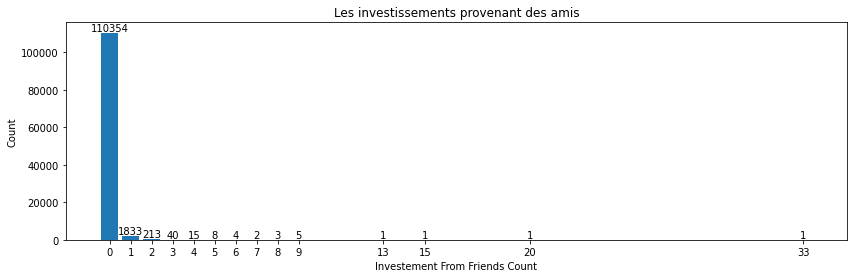

In [70]:
# Visualisation de la variable  InvestmentFromFriendsCount
plt.figure(figsize=(14, 4))
plt.bar(investmentFromFriendsCount.index, investmentFromFriendsCount);

for key, value in dict(investmentFromFriendsCount).items():
    plt.text(key, value, str(value), ha="center",va = "bottom")
plt.xticks(investment_ticks, investment_ticks_str);
plt.xlabel("Investement From Friends Count")
plt.ylabel("Count")
plt.title("Les investissements provenant des amis");

#### Interprétation

98.13% des financement des prêts sont faites par des particuliers différents des amis de l'emprunteur. 1.87% prêts sont financées des amis.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>La variable ProsperScore vas de 1-10. Cependant, notre dataset contient vas de 1-11. Il était alors nécessaire d'effacer les lignes ayant comme score 11 qui est probablement dû à une erreur de saisie.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this ?

> * Pour des raisons de maintenabilité, la variable "ListingCategory (numerical)" a été renomé en "ListingCategory". Ensuite Nous avons créé une nouvelle variable nommée ListingCategoryStr qui permet d'avoir le libellé des catégories numérique.  
> * Nous avons créé deux nouvelle variable (Year et Month) en utilisant la variable existante ListingCreationDate


## Bivariate Exploration

### Les personnes qui prennent des prêts de longue Term, rencontrent-ils des difficultés lors aux remboursement ?

In [71]:
# Prise de contact avec les occurences des status du prêts
df.LoanStatus.value_counts()

Current                   55157
Completed                 38043
Chargedoff                11992
Defaulted                  5017
Past Due (1-15 days)        805
Past Due (31-60 days)       363
Past Due (61-90 days)       312
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      202
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [72]:
"""
Selection des lignes dont les status sont 'completed', 'ChagedOff' et 'Defaulted'
Nous ignorons l'issue des autres modalitées.
"""
df1 = df.query("LoanStatus=='Completed'or LoanStatus=='Chargedoff'or LoanStatus=='Defaulted'" )

In [73]:
df1.LoanStatus.value_counts()

Completed     38043
Chargedoff    11992
Defaulted      5017
Name: LoanStatus, dtype: int64

In [74]:
"""
Création d'une nouvelle variable nommé 'LoanDefaulted'.
Cette variable prend deux modalités : Yes or No.
La modalité Yes designe que la personne à un status soit à Defaulted soit à ChargedOff.
La modalité No désigne que la personne à un status completed
"""
df1["LoanDefaulted"] = df1.LoanStatus.replace(to_replace=["Defaulted", "Chargedoff"], value="Yes")
df1["LoanDefaulted"] = df1.LoanDefaulted.replace(to_replace=[ "Completed"], value="No")

In [75]:
# Veriffication effective de l'ajout de la nouvelle variable dans le dataset
df1["LoanDefaulted"].unique()

array(['No', 'Yes'], dtype=object)

In [76]:
# Value_counts de la variable LoanDefauled
LoanDefaulted_counts = df1.LoanDefaulted.value_counts()
LoanDefaulted_counts

No     38043
Yes    17009
Name: LoanDefaulted, dtype: int64

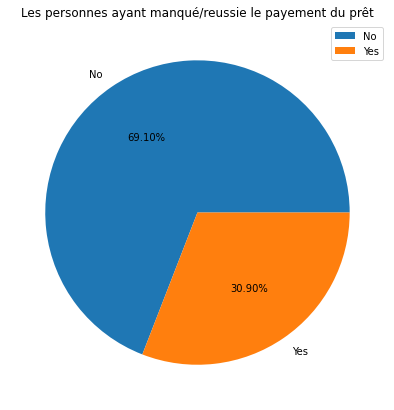

In [77]:
# Affichage des proportions de chaque modalité de la variable LoanDefaulted
plt.figure(figsize=(18, 7), facecolor="white")
plt.pie(LoanDefaulted_counts, labels= LoanDefaulted_counts.index, autopct="%.2f%%");
plt.legend()
plt.title("Les personnes ayant manqué/reussie le payement du prêt");

#### Interprétation

69.10% des personnes ont fini de payés leur prêt tandis que 30.90% des personnes n'ont pas pu rembourser leurs prêts.


In [79]:
# Description des personnes qui n'ont pas payé leurs prêts.
df1.query("LoanDefaulted=='No'").describe(include="all")

,Term,LoanStatus,BorrowerRate,InvestmentFromFriendsCount,ListingCategory,IncomeRange,IncomeVerifiable,ProsperScore,EmploymentStatus,LoanOriginalAmount,BorrowerState,ProsperRating (Alpha),IsBorrowerHomeowner,DebtToIncomeRatio,ListingCreationDate,Year,Month,ListingCategoryStr,LoanDefaulted
count,38043.000000,38043,38043.00000,38043.0,38043.000000,38043,38043,19633.000000,36604,38043.000000,34160,19633,38043,35310.000000,38043,38043.000000,38043.000000,38043,38043
unique,NaN,1,NaN,14.0,NaN,8,2,NaN,8,NaN,51,7,2,NaN,38031,NaN,NaN,21,1
top,NaN,Completed,NaN,0.0,NaN,"$25,000-49,999",True,NaN,Full-time,NaN,CA,D,False,NaN,2013-09-21 11:35:49.803000,NaN,NaN,Debt Consolidation,No
freq,NaN,38043,NaN,36508.0,NaN,10884,35262,NaN,17397,NaN,4952,4192,19785,NaN,2,NaN,NaN,13148,38043
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-11-09 20:44:28.847000,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-13 10:15:15.503000,NaN,NaN,NaN,NaN
mean,36.608154,NaN,0.18650,NaN,2.536656,NaN,NaN,6.529466,NaN,6182.339327,NaN,NaN,NaN,0.264228,NaN,2009.211208,6.454354,NaN,NaN
std,7.624669,NaN,0.08125,NaN,3.435274,NaN,NaN,2.298825,NaN,5075.274283,NaN,NaN,NaN,0.629161,NaN,2.178101,3.329422,NaN,NaN
min,12.000000,NaN,0.00000,NaN,0.000000,NaN,NaN,1.000000,NaN,1000.000000,NaN,NaN,NaN,0.000000,NaN,2005.000000,1.000000,NaN,NaN
25%,36.000000,NaN,0.11750,NaN,0.000000,NaN,NaN,5.000000,NaN,2550.000000,NaN,NaN,NaN,0.120000,NaN,2007.000000,4.000000,NaN,NaN


In [80]:
# Description des personnes qui ont payé leurs prêts
df1.query("LoanDefaulted=='Yes'").describe(include="all")

,Term,LoanStatus,BorrowerRate,InvestmentFromFriendsCount,ListingCategory,IncomeRange,IncomeVerifiable,ProsperScore,EmploymentStatus,LoanOriginalAmount,BorrowerState,ProsperRating (Alpha),IsBorrowerHomeowner,DebtToIncomeRatio,ListingCreationDate,Year,Month,ListingCategoryStr,LoanDefaulted
count,17009.000000,17009,17009.000000,17009.0,17009.000000,17009,17009,6340.000000,16196,17009.000000,15380,6340,17009,15514.000000,17009,17009.000000,17009.000000,17009,17009
unique,NaN,2,NaN,7.0,NaN,8,2,NaN,8,NaN,51,7,2,NaN,17009,NaN,NaN,21,1
top,NaN,Chargedoff,NaN,0.0,NaN,"$25,000-49,999",True,NaN,Full-time,NaN,CA,D,False,NaN,2012-04-10 09:14:46.297000,NaN,NaN,Not Available,Yes
freq,NaN,11992,NaN,16531.0,NaN,5452,15492,NaN,7560,NaN,2306,1677,9404,NaN,1,NaN,NaN,6695,17009
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-25 17:48:43.480000,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-09-26 23:42:27.433000,NaN,NaN,NaN,NaN
mean,37.679111,NaN,0.231769,NaN,2.118173,NaN,NaN,5.426183,NaN,6425.072844,NaN,NaN,NaN,0.348421,NaN,2008.659533,6.367217,NaN,NaN
std,6.560148,NaN,0.072086,NaN,3.294788,NaN,NaN,2.161578,NaN,5494.392665,NaN,NaN,NaN,0.934533,NaN,2.167131,3.276103,NaN,NaN
min,12.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,1000.000000,NaN,NaN,NaN,0.000000,NaN,2006.000000,1.000000,NaN,NaN
25%,36.000000,NaN,0.170000,NaN,0.000000,NaN,NaN,4.000000,NaN,2900.000000,NaN,NaN,NaN,0.139310,NaN,2007.000000,4.000000,NaN,NaN


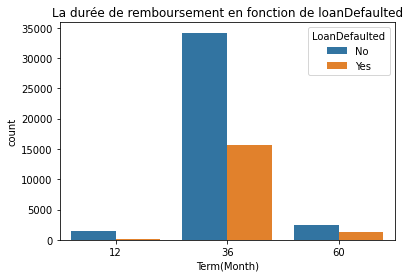

In [81]:
# Visualisation de la durée des prêts en fonction du status du prêts
plt.title("La durée de remboursement en fonction de loanDefaulted")
sns.countplot(data = df1, x = "Term", hue="LoanDefaulted");
plt.xlabel("Term(Month)");

#### Interprétation

Majoritairement, les personnes qui font des prêts pour de 12mois sont solvables. Les prêts de 60 mois sont également solvables. Cependant, les prêts de 36 mois ont un problème de solvabilité d'autant plus qu'il y'a un effectif très élevé de personnes qui n'ont pas soldés leurs dettes.


### Le taux de remboursement de prêts a t-il connue une hausse dépuis 2009 ?

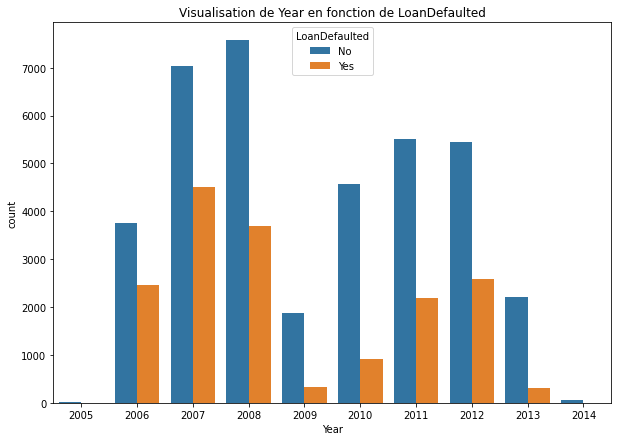

In [82]:
# Visualisation des années en fonction des personnes ayant payés les dettes
plt.figure(figsize=(10, 7))
sns.countplot(data = df1, x = "Year", hue = "LoanDefaulted");
plt.title("Visualisation de Year en fonction de LoanDefaulted");

#### Interprétation

Les prêts contracter durant l'année 2006 et 2007 ont beaucoup plus de chance de ne pas être rembourser par rapport aux autres années. Si l'on prend l'année 2010, 2011, 2012, 2013, il y'a plus de chance que ces prêts soit remboursé car il présente beaucoup plus de proportion. Plus les années augmente plus le taux d'incertitude diminue. La variable Year, nous permet de savoir si oui ou non, un prêt sera soldé.


In [83]:
# Calcul de la corrélation entre les deux variables
df1[["IsBorrowerHomeowner", "LoanDefaulted"]].value_counts().reset_index().corr()

,IsBorrowerHomeowner,0
IsBorrowerHomeowner,1.000000,-0.156172
0,-0.156172,1.000000


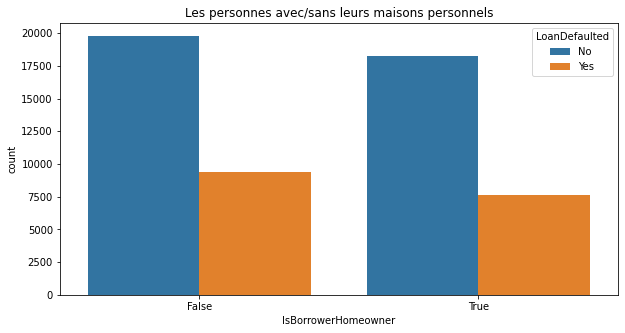

In [84]:
# Affichage graphique des proportions de la variable IsBorrowerHomeowner en fonction de LoanDefaulted
plt.figure(figsize=(10, 5))
sns.countplot(data = df1, x = "IsBorrowerHomeowner", hue="LoanDefaulted")
plt.title("Les personnes avec/sans leurs maisons personnels");

#### Interprétation

Il y'a une faible et négative corrélation entre la variable "IsBorrowerHomeowner" et "LoanDefaulted". La dépendance entre ces deux variables est très faible.


### Quel est plage des revenues de ceux qui ont des maisons en leurs noms?

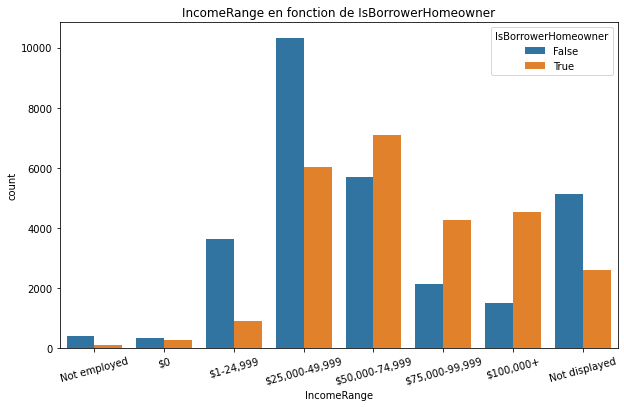

In [85]:
# Visualisation des sources de revenues des personnes qui ont ou non une maison en leur non.
plt.figure(figsize=(10, 6))
sns.countplot(data = df1, x = "IncomeRange", hue="IsBorrowerHomeowner");
plt.title("IncomeRange en fonction de IsBorrowerHomeowner");
plt.xticks(rotation=15);

#### Interprétation

Les personnes dont leurs sources de revenues dépasses $50000 sont ont en grandes majorité des maisons en leur nom. Par contre les personnes dont leurs sources de revenus sont inférieures à 50 000 dollars en majorité n'ont pas de maison propre à eux. Ces personnes vivent surement en location.


### Une source de revenues plus élevés augmente t-elle la chance de remboursement de prêts ?

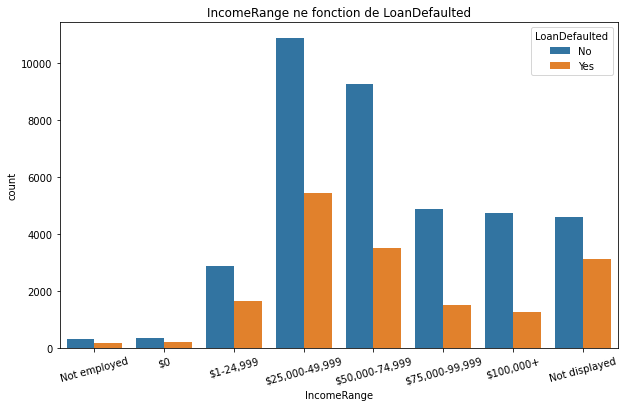

In [86]:
# Affichage de sources de revenues des personnes qui ont rembourser leurs prêts.
plt.figure(figsize=(10, 6))
sns.countplot(data = df1, x = "IncomeRange", hue="LoanDefaulted");
plt.title("IncomeRange en fonction de LoanDefaulted")
plt.xticks(rotation=15);

#### Interprétation

Les personnes non employées et ceux ayant une source de revenue compris entre 0-24.999 dollars ont des problèmes de solvabilité. Ces personnes sont beaucoup plus susceptibles d'être en retard dans le payement de leurs dettes voire impossible de payer leurs dettes. Nous observons la même avec ceux dont leurs sources de revenus ne sont pas affichées. Les personnes dont leurs sources de revenues est d'au moins 25_000 dollars sont beaucoup plus favorables au remboursement de leurs prêts.


### Les personnes présentant des documents justificatif de leurs sources de revenues paient-ils réguliérement leurs prêts?

In [87]:
df1.query("IncomeVerifiable==False").describe(include="all")

,Term,LoanStatus,BorrowerRate,InvestmentFromFriendsCount,ListingCategory,IncomeRange,IncomeVerifiable,ProsperScore,EmploymentStatus,LoanOriginalAmount,BorrowerState,ProsperRating (Alpha),IsBorrowerHomeowner,DebtToIncomeRatio,ListingCreationDate,Year,Month,ListingCategoryStr,LoanDefaulted
count,4298.000000,4298,4298.000000,4298.0,4298.000000,4298,4298,2963.000000,4260,4298.000000,4168,2963,4298,232.000000,4298,4298.000000,4298.000000,4298,4298
unique,NaN,3,NaN,11.0,NaN,8,1,NaN,8,NaN,51,7,2,NaN,4298,NaN,NaN,20,2
top,NaN,Completed,NaN,0.0,NaN,"$25,000-49,999",False,NaN,Self-employed,NaN,CA,D,False,NaN,2008-06-29 23:23:40.157000,NaN,NaN,Debt Consolidation,No
freq,NaN,2781,NaN,4018.0,NaN,1092,4298,NaN,1928,NaN,592,767,2739,NaN,1,NaN,NaN,1217,2781
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-09 17:19:40.003000,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-25 01:08:11.710000,NaN,NaN,NaN,NaN
mean,36.949279,NaN,0.233912,NaN,3.550023,NaN,NaN,5.062099,NaN,5840.659842,NaN,NaN,NaN,7.972241,NaN,2010.001629,6.557701,NaN,NaN
std,8.423055,NaN,0.081090,NaN,3.630148,NaN,NaN,2.261185,NaN,4872.922858,NaN,NaN,NaN,3.999146,NaN,1.874277,3.236407,NaN,NaN
min,12.000000,NaN,0.005000,NaN,0.000000,NaN,NaN,1.000000,NaN,1000.000000,NaN,NaN,NaN,0.000440,NaN,2006.000000,1.000000,NaN,NaN
25%,36.000000,NaN,0.164575,NaN,1.000000,NaN,NaN,3.000000,NaN,2500.000000,NaN,NaN,NaN,10.010000,NaN,2008.000000,4.000000,NaN,NaN


In [88]:
df1.query("IncomeVerifiable==False")["EmploymentStatus"].value_counts()

Self-employed    1928
Employed          751
Full-time         739
Not employed      448
Other             147
Part-time         120
Not available      76
Retired            51
Name: EmploymentStatus, dtype: int64

In [89]:
df1.query("IncomeVerifiable==True")["EmploymentStatus"].value_counts()

Full-time        24218
Employed         15710
Not available     5270
Self-employed      996
Part-time          936
Other              651
Retired            646
Not employed       113
Name: EmploymentStatus, dtype: int64

In [90]:
df1.query("IncomeVerifiable==True").describe(include="all")

,Term,LoanStatus,BorrowerRate,InvestmentFromFriendsCount,ListingCategory,IncomeRange,IncomeVerifiable,ProsperScore,EmploymentStatus,LoanOriginalAmount,BorrowerState,ProsperRating (Alpha),IsBorrowerHomeowner,DebtToIncomeRatio,ListingCreationDate,Year,Month,ListingCategoryStr,LoanDefaulted
count,50754.000000,50754,50754.000000,50754.0,50754.000000,50754,50754,23010.000000,48540,50754.000000,45372,23010,50754,50592.000000,50754,50754.000000,50754.000000,50754,50754
unique,NaN,3,NaN,13.0,NaN,8,1,NaN,8,NaN,51,7,2,NaN,50742,NaN,NaN,21,2
top,NaN,Completed,NaN,0.0,NaN,"$25,000-49,999",True,NaN,Full-time,NaN,CA,D,False,NaN,2013-10-30 10:05:18.823000,NaN,NaN,Debt Consolidation,No
freq,NaN,35262,NaN,49021.0,NaN,15244,50754,NaN,24218,NaN,6666,5102,26450,NaN,2,NaN,NaN,16630,35262
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-11-09 20:44:28.847000,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-13 10:15:15.503000,NaN,NaN,NaN,NaN
mean,36.938172,NaN,0.197656,NaN,2.310596,NaN,NaN,6.414429,NaN,6292.620148,NaN,NaN,NaN,0.254699,NaN,2008.959392,6.416401,NaN,NaN
std,7.228846,NaN,0.080653,NaN,3.359809,NaN,NaN,2.276605,NaN,5235.558374,NaN,NaN,NaN,0.447964,NaN,2.195009,3.319477,NaN,NaN
min,12.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,1000.000000,NaN,NaN,NaN,0.000000,NaN,2005.000000,1.000000,NaN,NaN
25%,36.000000,NaN,0.132000,NaN,0.000000,NaN,NaN,5.000000,NaN,2700.000000,NaN,NaN,NaN,0.130000,NaN,2007.000000,4.000000,NaN,NaN


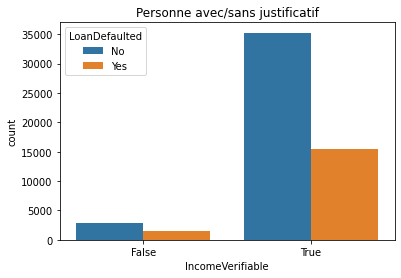

In [91]:
sns.countplot(data = df1, x = "IncomeVerifiable", hue="LoanDefaulted");
plt.title("Personne avec/sans justificatif");

#### Interprétation

Les personnes qui n'ont pas document justificatif de leurs sources de revenue sont générale dans l'auto-emploie. Ces personnes ont beaucoup plus de mal à rembourser leurs prêts faute d'emplois fixe leurs assurant une revenue plus stable. Par contre ceux ayant des documents justificatif travail majoritaire en temps plein, ce qui leurs assure un revenue mensuel stable. Ces personnes sont beaucoup plus favorables aux remboursements des prêts qu'aux premiers catégorie.


### Qui des personnes solvables et non solvables ont en moyenne un fort taux ?

In [93]:
# Description des taux d'intérêt de personnes qui n'ont pas rembourser leurs prêts
df1.query("LoanDefaulted=='Yes'").BorrowerRate.describe()

count    17009.000000
mean         0.231769
std          0.072086
min          0.000000
25%          0.170000
50%          0.238700
75%          0.290000
max          0.497500
Name: BorrowerRate, dtype: float64

In [94]:
# Description des taux d'intérêt de personnes qui n'ont pas rembourser leurs prêts
df1.query("LoanDefaulted=='No'").BorrowerRate.describe()

count    38043.00000
mean         0.18650
std          0.08125
min          0.00000
25%          0.11750
50%          0.17450
75%          0.25110
max          0.49750
Name: BorrowerRate, dtype: float64

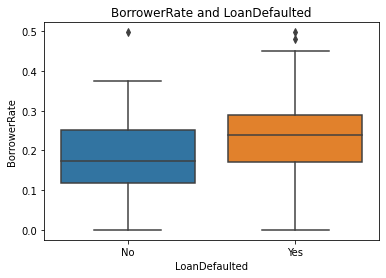

In [95]:
## Visualisation de la rélation entre la variable BorrowerRate et LoanDefaulted
sns.boxplot(data = df1, y = "BorrowerRate", x="LoanDefaulted");
plt.title("BorrowerRate and LoanDefaulted");

#### Interprétation

L'analyse de la relation entre la variable BorrowerRate et LoanDefaulted nous montre qu'en moyenne le taux d'intérêts des personnes solvables est d'environ 18.65%. En plus 75% de ceux-ci ont un taux d'intérêts valant 25.11%. Par contre les personnes qui n'ont pas pu rembourser leurs prêts ont un taux élevé valant 23.18% en moyenne. De plus la majorité c'est-à-dire 75% de ceux-ci ont un taux égal à 29%. Nous pouvons conclure en disant que les personnes solvables ont un faible taux d'intérêts tandis que les personnes n'ont solvables ont un fort taux en moyenne.


### Le montant du prêt nous permet-il de savoir si oui ou non le prêts sera payé ?

In [96]:
# Desciption du montant des personnes qui n'ont pas rembourser leurs prêts
df1.query("LoanDefaulted=='Yes'").LoanOriginalAmount.describe()

count    17009.000000
mean      6425.072844
std       5494.392665
min       1000.000000
25%       2900.000000
50%       4500.000000
75%       8000.000000
max      25000.000000
Name: LoanOriginalAmount, dtype: float64

In [97]:
# Desciption du montant des personnes qui ont pas rembourser leurs prêts
df1.query("LoanDefaulted=='No'").LoanOriginalAmount.describe()

count    38043.000000
mean      6182.339327
std       5075.274283
min       1000.000000
25%       2550.000000
50%       4500.000000
75%       8000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

<AxesSubplot:xlabel='LoanDefaulted', ylabel='LoanOriginalAmount'>

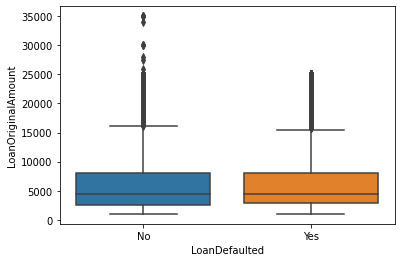

In [98]:
# Visualisation de la variable LoanDefaulted en fonction de LoanOriginalAmount
sns.boxplot(data = df1, y = "LoanOriginalAmount", x="LoanDefaulted")
plt.title("LoanOriginalAmount en fonction de LoanDefaulted");

#### Interprétation

Le montant maximal des personnes qui ont ou non rembourser leurs dettes sont égaux (35 000). Cependant les personnes qui ont remboursé leurs prêts en moyenne ont un montant de 6182.34 dollars comparativement aux personnes qui ont échoué dans le remboursement des prêts qui est de 6425.07 dollars. Ainsi le montant du prêt ne nous permet pas cerner clairement les personnes aptes ou non à rembourser leurs prêts.


### Les personnes ayant une importante source de revenue gagne-t-il plus de montant de prêts ?

In [99]:
df1.IncomeRange.unique()

['$25,000-49,999', 'Not displayed', '$1-24,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed', '$0']
Categories (8, object): ['Not employed' < '$0' < '$1-24,999' < '$25,000-49,999' < '$50,000-74,999' < '$75,000-99,999' < '$100,000+' < 'Not displayed']

In [100]:
# Groupement des données en fonction des source de revenues
# Description des montant reçu de chaque groupe
df1.groupby("IncomeRange").LoanOriginalAmount.describe()

,count,mean,std,min,25%,50%,75%,max
IncomeRange,,,,,,,,
Not employed,532.0,4579.518797,3720.073569,1000.0,2000.0,4000.0,5275.0,25000.0
$0,606.0,7421.953795,6847.211367,1000.0,2500.0,5000.0,10000.0,25000.0
"$1-24,999",4571.0,4164.763509,3487.885993,1000.0,2000.0,3001.0,5000.0,25000.0
"$25,000-49,999",16336.0,5285.527363,4070.548886,1000.0,2500.0,4000.0,7000.0,25000.0
"$50,000-74,999",12788.0,6563.221849,4969.532359,1000.0,3000.0,5000.0,9000.0,25000.0
"$75,000-99,999",6431.0,7716.608615,5709.860477,1000.0,3500.0,6000.0,10000.0,25000.0
"$100,000+",6051.0,9683.777557,6820.471279,1000.0,4000.0,7500.0,15000.0,35000.0
Not displayed,7737.0,5171.352333,4986.832752,1000.0,2100.0,3035.0,6001.0,25000.0


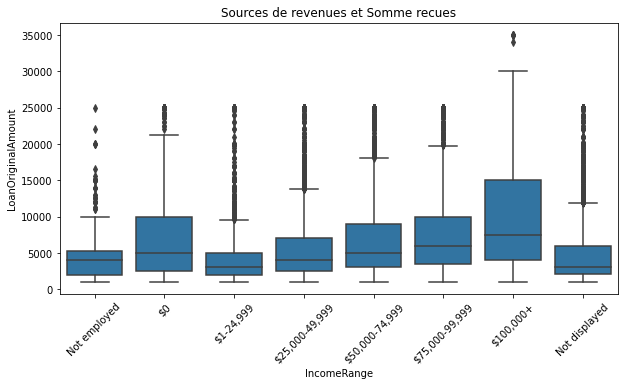

In [101]:
# Visualisation des sources de revenues et des montant reçuent
plt.figure(figsize=(10, 5))
sns.boxplot(data = df1, x = "IncomeRange", y="LoanOriginalAmount", color=base_color)
plt.xticks(rotation=45)
plt.title("Sources de revenues et Somme recues");

#### Interprétation

Les emprunteurs ayant une source de revenue au moins égale à 100000 dollars ont beaucoup plus de chance d'avoir une importante somme d'argent de prêts. La somme maximale qu'ils peuvent avoir est de 35 000 dollars ce qui est nettement supérieur à ceux qui ont une source de revenues inférieur 10000 qui ont une somme maximale de 25 000. En conclusion Plus les sources de revenues sont élevées plus ont à beaucoup de chance d'avoir un gros montant de prêts.


#### Les importantes sources de revenues bénéficient-ils de bon score ?

In [102]:
# Describe sur le score des différentes groupes des source de revenues
df1.groupby("IncomeRange").ProsperScore.describe()

,count,mean,std,min,25%,50%,75%,max
IncomeRange,,,,,,,,
Not employed,375.0,5.456000,1.896397,1.0,4.0,5.0,7.00,10.0
$0,30.0,4.700000,2.002585,1.0,4.0,5.0,5.75,9.0
"$1-24,999",1951.0,5.598155,2.121073,1.0,4.0,6.0,7.00,10.0
"$25,000-49,999",8320.0,6.003606,2.229470,1.0,4.0,6.0,8.00,10.0
"$50,000-74,999",7365.0,6.299661,2.298526,1.0,5.0,6.0,8.00,10.0
"$75,000-99,999",4013.0,6.605034,2.334821,1.0,5.0,7.0,8.00,10.0
"$100,000+",3919.0,6.795866,2.449422,1.0,5.0,7.0,9.00,10.0
Not displayed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


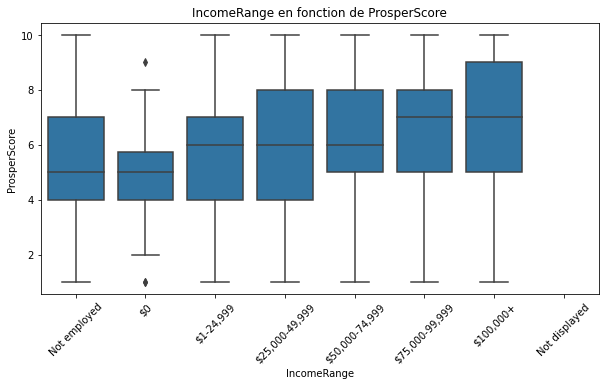

In [103]:
# Affichage des sources de revenues en fonction du score
plt.figure(figsize=(10, 5))
sns.boxplot(data = df1, x = "IncomeRange", y = "ProsperScore", color=base_color)
plt.xticks(rotation=45);
plt.title("IncomeRange en fonction de ProsperScore");

#### Interprétation

Les sources de revenus sont très importantes dans l'octroiement des scores de prosper. En effet, 75% des personnes qui ont leurs sources de revenues supérieur ou égale à 25 000 ont un bon score (8). Par contre ceux ayant une valeur faible ont un score également faible. 75% des emprunteurs ayant une source de revenue d'au moins 100000 dollars ont 9 comme score.


### Le montant reçu est-il fonction du score ?

In [105]:
"""
    groupement des données par le score
    
    Decription de chaque groupe de score en fonction du montant original du prêt 
"""
df1.groupby("ProsperScore").LoanOriginalAmount.describe()

,count,mean,std,min,25%,50%,75%,max
ProsperScore,,,,,,,,
1.0,613.0,4410.528548,2290.252237,1000.0,3200.0,4000.0,5000.0,15000.0
2.0,1295.0,4924.945174,3179.797825,1000.0,3500.0,4000.0,5000.0,15000.0
3.0,1566.0,5325.443167,3779.581304,1000.0,3000.0,4000.0,6000.0,25000.0
4.0,2731.0,5582.579641,3986.528798,1000.0,3000.0,4000.0,7500.0,25000.0
5.0,3284.0,5844.193666,4117.045261,1000.0,3000.0,4000.0,7500.0,25000.0
6.0,3945.0,6484.459569,4454.808924,1000.0,3000.0,5000.0,9000.0,30000.0
7.0,3154.0,6780.642359,4857.099338,1000.0,3000.0,5000.0,9800.0,35000.0
8.0,4516.0,7704.804473,5363.463990,1000.0,3500.0,6000.0,10500.0,35000.0
9.0,3216.0,6370.921642,5088.520287,1000.0,2600.0,5000.0,8500.0,30000.0


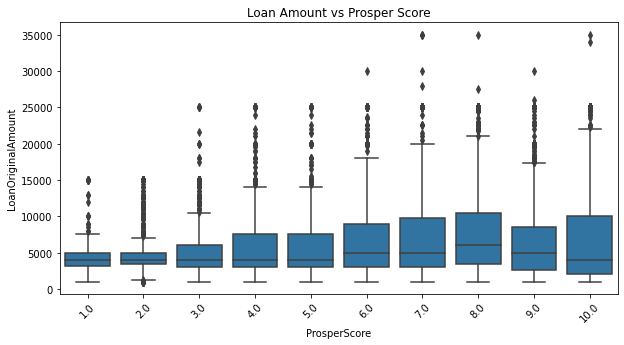

In [106]:
# Visualisation des montants du prêt en fonction du score
plt.figure(figsize=(10, 5))
sns.boxplot(data = df1, y = "LoanOriginalAmount", x = "ProsperScore", color=base_color)
plt.xticks(rotation=45);
plt.title("Loan Amount vs Prosper Score");

#### Interprétation

Le montant reçu par chaque emprunteur n'est pas fonction du score. Les personnes qui ont les meilleurs scores ne reçoivent pas forcément les plus grosses sommes d'argent. Les personnes qui ont un score à 8 gagne en moyenne 7704.80 dollars comme finance de leurs prêts contrairement à ceux qui ont pour score 10 mais ont en moyenne 6799.48 dollars.


#### Les personnes ayant un bon score ont-il necessaire de faible risque ?

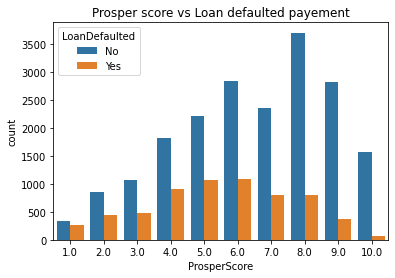

In [107]:
# Visualisation des score favorable aux remboursements des prêts
sns.countplot(data = df1, x ="ProsperScore", hue = "LoanDefaulted")
plt.title("Prosper score vs Loan defaulted payement");

#### Interprétation

Les personnes ayant de meilleur score ou de faible risque ont beaucoup plus de chance de rembourses leurs prêts. À cet effet, nous remarquons que les emprunteurs qui ont un bon score c'est à dire 8, 9, 10 ont de faible chance de ne pas payer leurs prêts. Ce qui n'est pas le cas ceux qui ont des scores inférieurs à 8.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> L’analyse entre la variable principale et les autres variables nous révèle que :  
> * Les prêts de longue durée aux des problèmes de solvabilité.   
> * Depuis l’année 2009, la proportion de prêts n’ont remboursé à considérablement diminuer. Cela s’explique par les nouvelles reformes fait apporter aux processus de prêts.  
> * En outre plus le source de revenue de l’emprunteur est élevé, plus il a de chance de solder son prêt.  
> * Le score de PROSPER est très efficace pour déterminer le risque de solvabilité des emprunteurs. C’est l’un des facteurs qui ont amélioré la solvabilité des prêts depuis les reformes fait par PROSPER.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> * Notre analyse nous montre que le score de prosper ne permet pas de déterminer le montant du financement d’un prêt. Ceci dit le score doit juste permet aux potentiels investisseurs de déterminer le risque lié aux financements d’un prêt. Il faut cependant noter que le source de revenue est lié aux scores de PROSPER, car plus un emprunteur à de source de revenues plus sont score est assez élevé que les autres.  
> * Il y’a également un lien entre le montant d’un prêt et la revenue de l’emprunteur. Plus la source de revenue est élevée plus le montant de financement est consistant.


## Multivariate Exploration

### Nous verrons si ceux qui sont solvable ont forcement de grand sources de revenues ?

Text(0.5, 0.98, 'Durée, source de revenue en fonction de loanDefaulted')

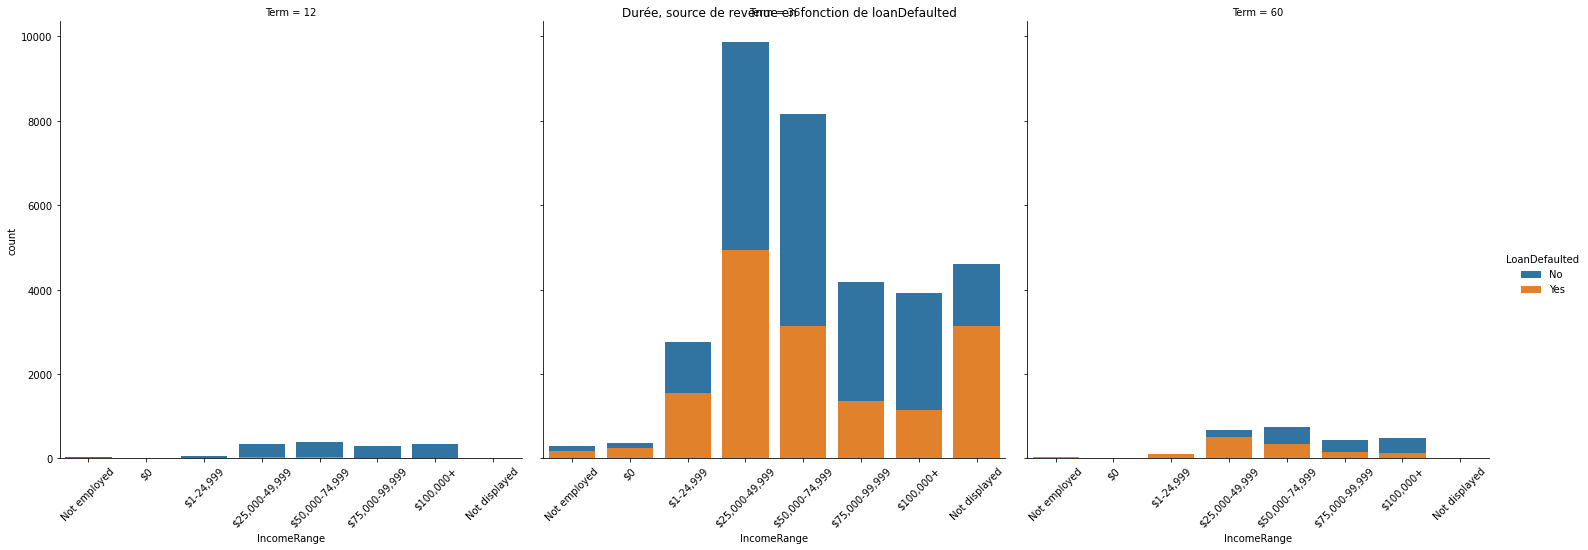

In [108]:
g = sns.FacetGrid(data = df1, col = "Term", hue="LoanDefaulted", height=7)
g.map(sns.countplot, "IncomeRange")
g.add_legend();
g.set_xticklabels(rotation=45)
plt.suptitle("Durée, source de revenue en fonction de loanDefaulted");

#### Interprétation

Les prêts qui durent 12 mois ont une grande proportion de solvabilité quel que soit la source de revenus. Les personnes qui font les prêts sur 60 mois et qui ont une source de revenue au moins égale à 50 000 dollars ont plus de chance de soldé leurs prêts. Par contre ceux ayant une source de revenues inférieur à ce montant pour la même durée présente une forte proportion de prêts impayé. Les personnes qui prennent des prêts de 36 mois dont la source de revenu est inférieure à 75 000 dollars présente une forte chance de ne payer pouvoir rembourser leurs prêts. Par contre ceux ayant des revenus de 100 000 dollars et plus présente une faible proportion de dettes impayés.


### Les montants des prêts améliorent t'ils la solvabilité des prêts ? 

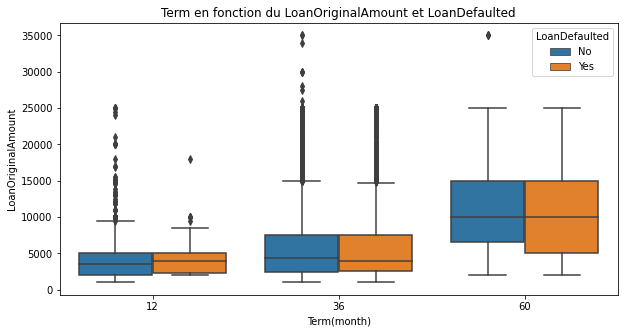

In [113]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df1, x = "Term", y = "LoanOriginalAmount", hue="LoanDefaulted")
plt.xlabel("Term(month)")
plt.title("Term en fonction du LoanOriginalAmount et LoanDefaulted");

#### Interprétation

Plus la somme est importante plus la durée de remboursement est longue. Ce résultat est perceptible par le graphique ci-dessus. Le montant maximum des prêts qui dure 36 mois est inférieur au mois de 60mois. Cependant le montant du prêt ne permet pas de déterminer si l'emprunteur pourra rembourser son prés. En effet, chaque période (12, 36, 60) présente quasiment une même valeur médiane ainsi que les bornes supérieures du boxplot.


### Quel est l'apport du score dans le remboursement des prêts ?

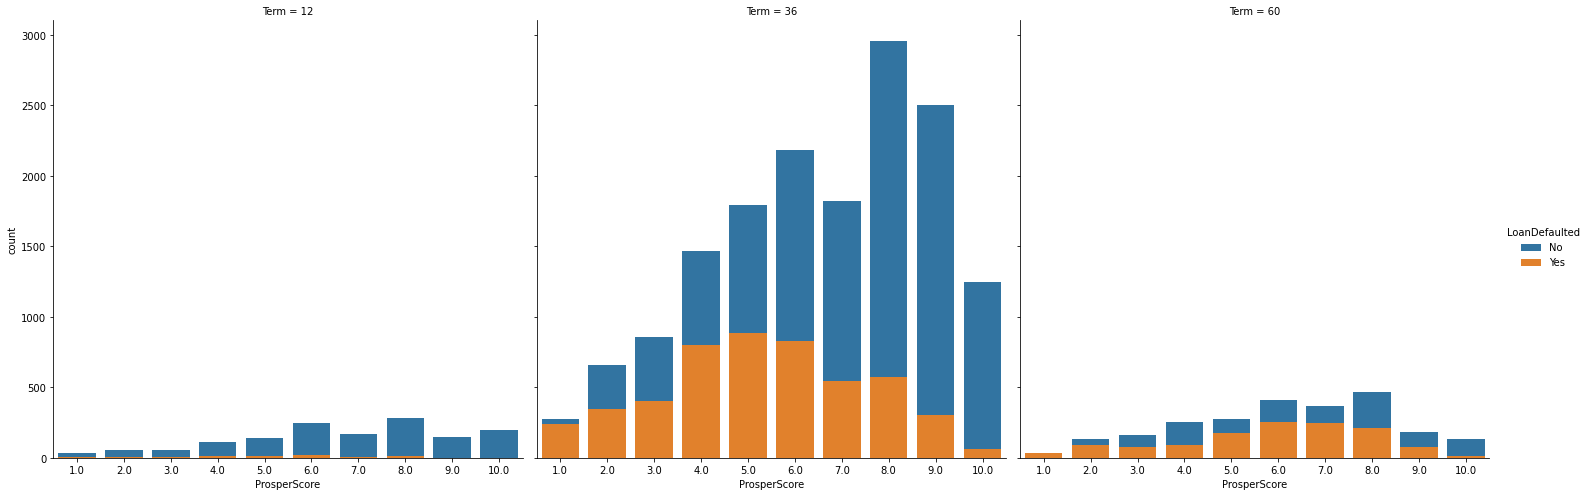

In [110]:
g = sns.FacetGrid(data = df1, col = "Term", hue="LoanDefaulted", height=7)
g.map(sns.countplot, "ProsperScore", )
g.add_legend();

#### Interprétation

Les prêts de durée minimale (12 mois) nous montrent que plus le score est élevé plus la personne à moins de problème de solvabilité. Les prêts de 36 et 60 mois nous montre que les personnes de faible score ont de sérieux problème de solvabilité. Par exemple les personnes qui ont un score de 10 présente une grande proportion de prêts rembourser comparativement au score de 1 et 2. Le Score de prosper est un bon indicateur de la solvabilité d’un prêt.



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

>  En explorant les données, nous avons découvert que les prêts qui ont une durée de 12 mois rencontre très moins de problème de solvabilité comparativement aux prêts de longue durée.

## Conclusions

In [111]:
prosperLoanData.shape

(113937, 81)